Insira o comprimento da área de plantação em metros: 100
Insira a largura da área de plantação em metros: 50
Insira o raio de cobertura dos aspersores em metros entre as opções a seguir: [5, 7, 10, 15, 20, 25, 30]: 4
Opção inválida. Tente novamente.
Insira o raio de cobertura dos aspersores em metros entre as opções a seguir: [5, 7, 10, 15, 20, 25, 30]: 3
Opção inválida. Tente novamente.
Insira o raio de cobertura dos aspersores em metros entre as opções a seguir: [5, 7, 10, 15, 20, 25, 30]: 10


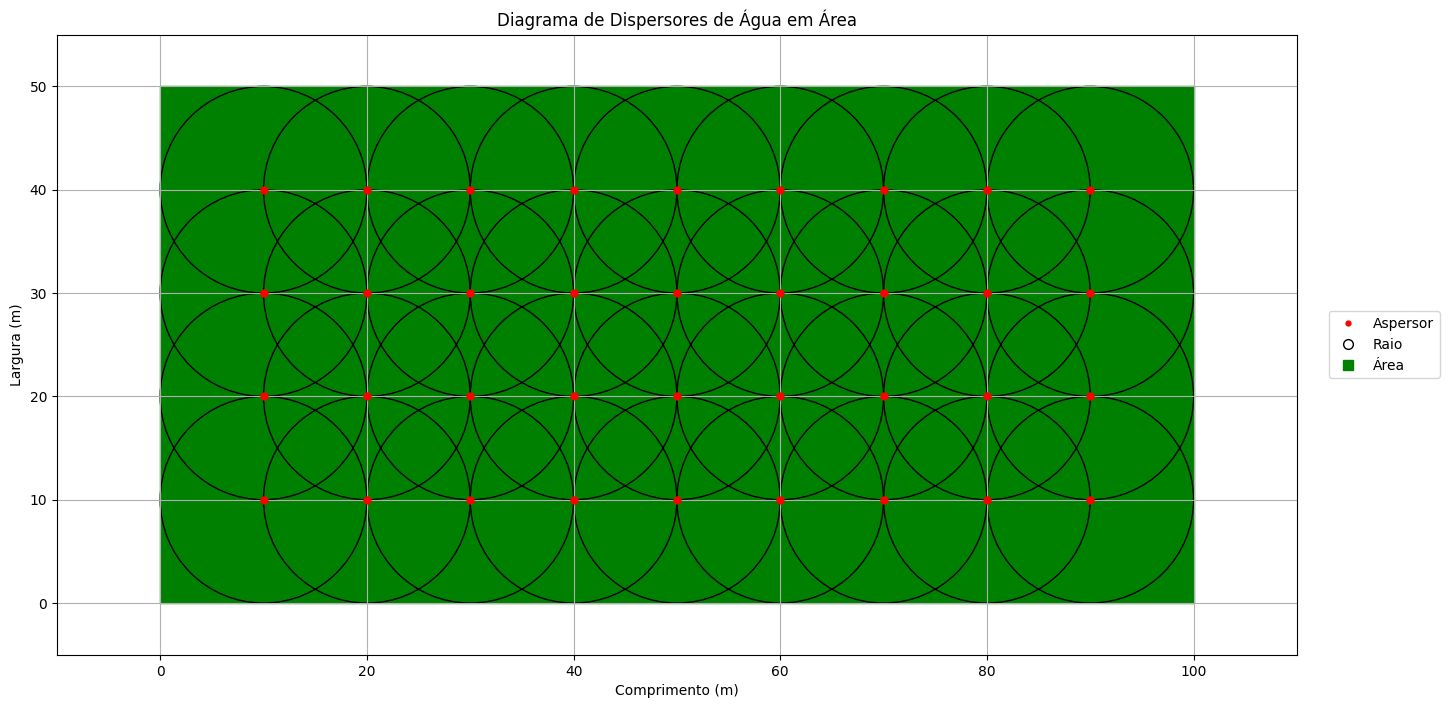

Número de aspersores necessários: 36
Distância horizontal entre aspersores: 10 m
Distância vertical entre aspersores: 10 m
Distância entre aspersores e as arestas: 11 m
Área total de plantação: 5000.00 m²


In [8]:
import math
import matplotlib.pyplot as plt


comprimento = float(input("Insira o comprimento da área de plantação em metros: "))
largura = float(input("Insira a largura da área de plantação em metros: "))
#raio = float(input("Insira o raio de cobertura dos aspersores em metros: "))

opcao_dis = [5, 7, 10, 15, 20, 25, 30]
while True:
    raio = int(input(f"Insira o raio de cobertura dos aspersores em metros entre as opções a seguir: {opcao_dis}: "))
    if raio in opcao_dis:
        break
        
    else:
        print("Opção inválida. Tente novamente.")
        



# Cálculo do diâmetro do círculo de cobertura do aspersor
diametro = raio * 2

# Cálculo do espaçamento entre os aspersores
espacamento_horizontal = diametro - raio  # Considerando cobertura mínima do raio de um aspersor pelo raio do outro
espacamento_vertical = diametro - raio    # Considerando cobertura mínima do raio de um aspersor pelo raio do outro


# Cálculo da quantidade total de aspersores necessários
qtd_aspersores_horizontal = math.ceil((comprimento - espacamento_horizontal) / espacamento_horizontal)
qtd_aspersores_vertical = math.ceil((largura - espacamento_vertical) / espacamento_vertical)
qtd_aspersores = qtd_aspersores_horizontal * qtd_aspersores_vertical

# Posicionamento dos aspersores
aspersores = []
for i in range(qtd_aspersores_vertical):
    y = i * espacamento_vertical + espacamento_vertical / 2
    for j in range(qtd_aspersores_horizontal):
        x = j * espacamento_horizontal + espacamento_horizontal / 2
        aspersores.append((x, y))

center_x = (comprimento - espacamento_horizontal) / 2
center_y = (largura - espacamento_vertical) / 2
aspersores = [(x + center_x - (qtd_aspersores_horizontal - 1) / 2 * espacamento_horizontal,
              y + center_y - (qtd_aspersores_vertical - 1) / 2 * espacamento_vertical)
             for x, y in aspersores]

# Plotagem do gráfico
fig, ax = plt.subplots(figsize=(16, 9))
ax.set_xlim(0, comprimento)
ax.set_ylim(0, largura)
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-comprimento*0.1, comprimento*1.1)
ax.set_ylim(-largura*0.1, largura*1.1)

# Desenhar o retângulo da área de plantação
area_plantacao = plt.Rectangle((0, 0), comprimento, largura, color='green')
ax.add_patch(area_plantacao)

#Adiciona simbolos ao grafico
square = plt.Line2D([], [], color='green', marker='s', markersize=7, linestyle='none', label='Área')
red_dot = plt.Line2D([], [], color='red', marker='.', markersize=7, linestyle='none', label='Aspersor')
circle = plt.Line2D([], [], color='black', marker='o', markersize=7, fillstyle='none', linestyle='none', label='Raio')
plt.legend(handles=[red_dot, circle, square], loc='center left', bbox_to_anchor=(1.02, 0.5))

for aspersor in aspersores:
    circulo = plt.Circle(aspersor, raio, fill=False)
    ax.add_artist(circulo)
    ax.plot(aspersor[0], aspersor[1], 'ro', markersize=5)

plt.title("Diagrama de Dispersores de Água em Área")
plt.xlabel("Comprimento (m)")
plt.ylabel("Largura (m)")
plt.grid(True)
plt.show()

area_total_plantacao = comprimento * largura

dist_borda = raio + 1

# Saídas
print('Número de aspersores necessários: {}'.format(qtd_aspersores))
print('Distância horizontal entre aspersores: {} m'.format(espacamento_horizontal))
print('Distância vertical entre aspersores: {} m'.format(espacamento_vertical))
print('Distância entre aspersores e as arestas: {} m'.format(dist_borda))
print('Área total de plantação: {:.2f} m²'.format(area_total_plantacao))